In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

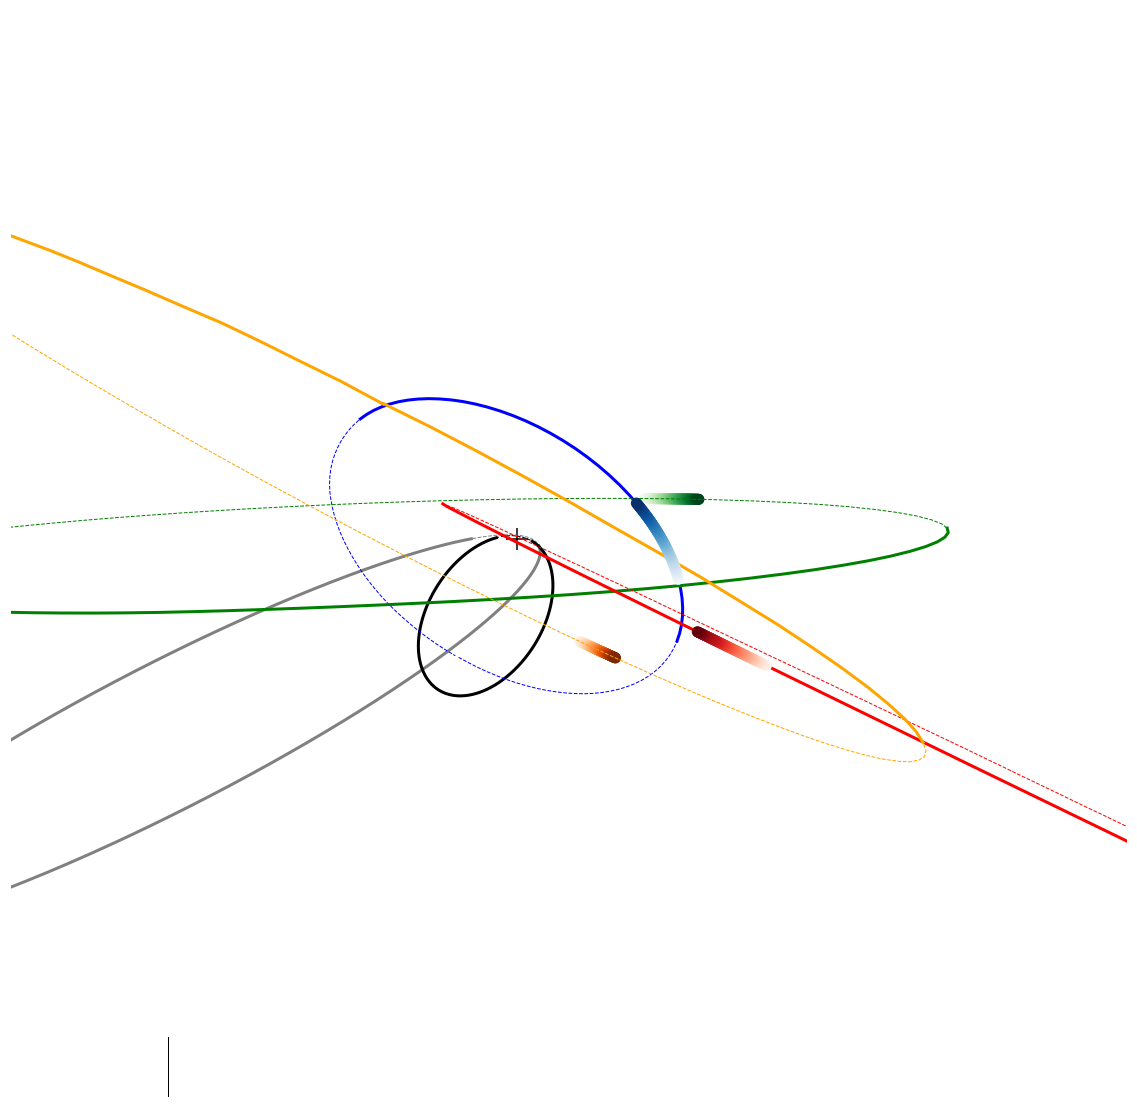

In [63]:
##### Plot ##

fig = plt.figure(figsize=(20,20))
ax  = fig.gca(projection='3d')

## Axis labels 
#plt.xlabel('RA [pc]', fontsize=20, labelpad=10)
#plt.ylabel('DEC [pc]',fontsize=20, labelpad=20)
#ax.set_zlabel('z [pc]', fontsize=20, rotation=0, labelpad=50)

## Plot plane of the sky
#x = np.arange(-.1,.1, 0.01)
#y = np.arange(-.1,.1, 0.01)
#x, y = np.meshgrid(x, y)
#z = (x + y)*0
#ax.plot_surface(x, y, z, rstride=8, cstride=8, alpha=0.1)
#ax.text(.03, -.09, .0, 'plane of the sky', color='gray', size=20)
#ax.text(-1.04, -0.91-1, -2.59, 'plane of the sky', color='gray', size=20)

## Plot axis orientation
ax.plot(np.linspace(-1.04,-0.52, 2), [-1.04-1,-1.04-1], [0,0], linewidth=1, linestyle='-', color='black')
ax.plot([-1.04,-1.04], np.linspace(-1.04-1,-0.525-1, 2), [0,0], linewidth=1, linestyle='-', color='black')
ax.plot([-1.04,-1.04], [-1.04-1,-1.04-1], np.linspace(0.,4.59, 2), linewidth=1, linestyle='-', color='black')
#ax.text(-0.5,  -1.07-1,  0,   'RA',  size=20)
#ax.text(-1.15, -0.5-1, 0,   'DEC', size=20)
#ax.text(-1.22,  -1.3-1, 0.1, 'z',   size=20)

## Scale
ax.plot(np.linspace(0.5,1, 2), [-2,-2], [0,0], linewidth=2, linestyle='-', color='black')
#ax.text(0.65, -1.95, 0, '0.5"', size=18)

## Plot Sgr A*
ax.scatter(0,0,0, s=500, color='black', marker='+', linewidths=50)
#ax.text(-0.2, -0.15, 0, 'SgrA*', size=20, fontweight='bold')
#ax.text(0.02, 0.02, 0.05, 'SgrA*', size=20, fontweight='bold')

## Plot stars
### S0-2 ....

## Add G1 & G2 3D positions
path_G = '/Users/ciurlo/Documents/UCLA/KVS/G1_G2_from_Gunther/'
G1     = np.loadtxt(path_G + 'G1.pos') 
G2     = np.loadtxt(path_G + 'G2.pos')
### Format: fracy RA[arcsec] DEC[arcsec] z[arcsec] vz[km/s] MJD
xG = G1[:,1]
yG = G1[:,2]
zG = -G1[:,3]
xG_front = xG[zG>=0.]
yG_front = yG[zG>=0.]
zG_front = zG[zG>=0.]
idx = (np.abs(zG_front - 0.)).argmin()
ax.plot(xG, yG, zG, color='gray', linewidth=1, linestyle='--')
ax.plot(xG_front[0:idx], yG_front[0:idx], zG_front[0:idx], color='gray', linewidth=3, linestyle='-')
#ax.plot(xG_front[idx+1:len(zG_front)], yG_front[idx+1:len(zG_front)], zG_front[idx+1:len(zG_front)], color='gray', linewidth=3, linestyle='-')
##ax.text(-0.4, -0.023, -0.077, 'G1', color='gray', size=25)
#ax.text(-0.3, -0.023, -0.077, 'G1', color='gray', size=25)
xG = G2[:,1]
yG = G2[:,2]
zG = -G2[:,3]
xG_front = xG[zG>=0.]
yG_front = yG[zG>=0.]
zG_front = zG[zG>=0.]
idx = (np.abs(zG_front - 0.)).argmin()
ax.plot(xG, yG, zG, color='black', linewidth=1, linestyle='--')
ax.plot(xG_front[0:idx], yG_front[0:idx], zG_front[0:idx], color='black', linewidth=3, linestyle='-')
ax.plot(xG_front[idx+1:len(zG_front)], yG_front[idx+1:len(zG_front)], zG_front[idx+1:len(zG_front)], color='black', linewidth=3, linestyle='-')
##ax.text(-0.35, -0.3, -0.54, 'G2', color='black', size=25)
#ax.text(-0.36, -0.22, -0.54, 'G2', color='black', size=25)
    
#ax.plot(G1[:,1], G1[:,2], G1[:,3], color='gray', linewidth=3, linestyle='-')
#ax.plot(G2[:,1], G2[:,2], G2[:,3],color='black', linewidth=3, linestyle='-')

## Load files ##
blobs = ['G3', 'G4', 'G5', 'G6'] 
cols  = ['blue', 'green', 'red', 'orange']
corrs = '_sys' #['', '_sys', '_sys'] # '' # _sys ##### vz0 # sysRV
mapcols = ['Blues', 'Greens', 'Reds', 'Oranges']
##labpos = [[0.13,0.39,0.57], [1.35,0.0,0], [1.55,-1.04,1.55], [-0.7,0.6,1.60]]
labpos = [[.42,0.02,0.57], [.4,0.15,0], [.55,-.34,1.55], [0.15,-.31,1.60]]

for i in range(0, len(blobs)):
    blob = blobs[i]
    col  = cols[i]
    corr = corrs
    mapcol = mapcols[i]
    pos = np.loadtxt('./chains_'+blob+corr+'/'+blob+'_mod_sing.pos')
    pos_whole = np.loadtxt('./chains_'+blob+corr+'/'+blob+'_mod.pos')#_whole.pos')
    # format: date x y z [AU]

    pos[:,1:4] = pos[:,1:4] * 4.84814e-6 * 25.88763 # AU -> pc -> arcsec
    pos_whole[:,1:4] = pos_whole[:,1:4] * 4.84814e-6 * 25.88763 # AU -> pc -> arcsec
 
    xG = pos_whole[:,1]
    yG = pos_whole[:,2]
    zG = -pos_whole[:,3]
    xG_front = xG[zG>=0.]
    yG_front = yG[zG>=0.]
    zG_front = zG[zG>=0.]
    idx = (np.abs(zG_front - 0.)).argmin()
    ax.plot(xG, yG, zG, color=col, linewidth=1, linestyle='--')
    ax.plot(xG_front[0:idx], yG_front[0:idx], zG_front[0:idx], color=col, linewidth=3, linestyle='-')
    ax.plot(xG_front[idx+1:len(zG_front)], yG_front[idx+1:len(zG_front)], zG_front[idx+1:len(zG_front)], color=col, linewidth=3, linestyle='-')
    
    ax.scatter(pos[:,1], pos[:,2], -pos[:,3], c=pos[:,0], cmap=mapcol, s=100, alpha=1)
    
    #ax.text(xG[0]*.9, yG[0]*.9, zG[0]*1.2, blob, color=col, size=25)
    #dt = 0.005
    #ax.text(pos[0,1]+dt/4., pos[0,2]+dt/4., -pos[0,3], blob, color=col, size=25)
    #ax.text(labpos[i][0], labpos[i][1], labpos[i][2], blob, color=col, size=25)

## Set 3D view point
#ax.view_init(120, -90) # prospective view
ax.view_init(90, -90) # view from front
#ax.view_init(180, -90) # view from above

## Set plot limits
#zoom = 1 
#ax.set_xlim([-2.+zoom,4.-zoom]) # use for full view
zoom = 2.1
ax.set_xlim([-2.8+zoom,3.2-zoom]) # use for zomm-in
ax.set_ylim([-3.+zoom,3.-zoom])
ax.set_zlim([-3.+zoom,3.-zoom])
ax.zaxis.set_major_locator(LinearLocator(5))

## Hide gird & axes ticks
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.axis('off')

plt.savefig('3D_plot.png')
#plt.savefig('prop_mot.eps')

plt.show()